Neubers Correction For Plastic Strain
==============

***ADL-ECR-020 ***

**Author:**   *M. Chilik*
**Check:**    *None*
**Date:**     *07/04/2019*
**Revision:** *A*

# Chapter One: Calculation

The linear strain energy will be calculated and equated to the elasto-plastic strain energy. The point on the elasto-plastic stress/strain curve corresponding to the linear strain energy can be derived and this can be assumed to be the 'true' stress/strain condition.
This redsitribution technique relies on adequate local material, behaving in an elastic manner, to which load transfer can take place.


In [162]:
# Peak Stress using linear material model
peak_stress_FEM = 1946.0 # psi

In [163]:
## Imports
import numpy as np
import scipy.interpolate

In [182]:
E   = 116500 # psi
Fty = 965    # psi
Ftu = 1034    # psi
n   = 33       # -
epu = 0.1      # %/100

ypt = 120
upt = 20

comp_el_stress = []
for i in range (0,ypt+upt+1,1):
    if i <= ypt-1:
        comp_el_stress.append(Fty/ypt*i)
    else:
        comp_el_stress.append(comp_el_stress[-1] + (Ftu - Fty)/upt)

nc = []
for i in range (0,ypt+upt+1,1):
    if i <= ypt-1:
        nc.append(n)
    else:
        nc.append(np.log(epu/0.002)/np.log(Ftu/Fty))



# Ramberg-Osgood Stress-Strain

RO_strain = [(comp_el_stress[i]/E)+0.002*np.power(comp_el_stress[i]/Fty,nc[i]) for i in range (0,ypt+upt+1,1)]

RO_stress = [comp_el_stress[i]*RO_strain[i]/2 for i in range (0,ypt+upt+1,1)]


# Neuber corrected peak stress
RO_peak_stress_correct = scipy.interpolate.interp1d(RO_stress, comp_el_stress)

eq_SE = (peak_stress_FEM/E*peak_stress_FEM)/2

peak_stress_correct = RO_peak_stress_correct(eq_SE)
print("Peak stress Neuber corrected: %0.00d MPa \n" % peak_stress_correct)

# Neuber corrected peak strain

if peak_stress_correct <= Fty:
    
    peak_strain_correct = (peak_stress_correct/E)+0.002*np.power(peak_stress_correct/Fty,n)
else:
    peak_strain_correct = (peak_stress_correct/E)+0.002*np.power(peak_stress_correct/Fty,np.log(epu/0.002)/np.log(Ftu/Fty))
    
print("Peak strain Neuber corrected: %0.4f - \n" % peak_strain_correct)

#Elastic stress

el_strain = peak_stress_FEM / E
el_stress = el_strain * peak_stress_FEM

# Linear FE stress
linear_FE_stress = [E*RO_strain[i] for i in range (0,ypt+upt+1,1)]
neuber_strain = [el_stress / linear_FE_stress[i+1] for i in range (0,ypt+upt,1)]
neuber_strain = [0] + neuber_strain

MoS = ( 1 / (peak_stress_correct/Ftu) - 1)*100
print("Margin of Safety: %d %% \n" % MoS)

Peak stress Neuber corrected: 1007 MPa 

Peak strain Neuber corrected: 0.0322 - 

Margin of Safety: 2 % 



---

# Chapter Two: Results Interpretation - Plot

Neuber Stress Correction can be interpreted as a correction that is applied to linear stress obtained from FEM. The results of the correction can be presented on a following graph: 

---

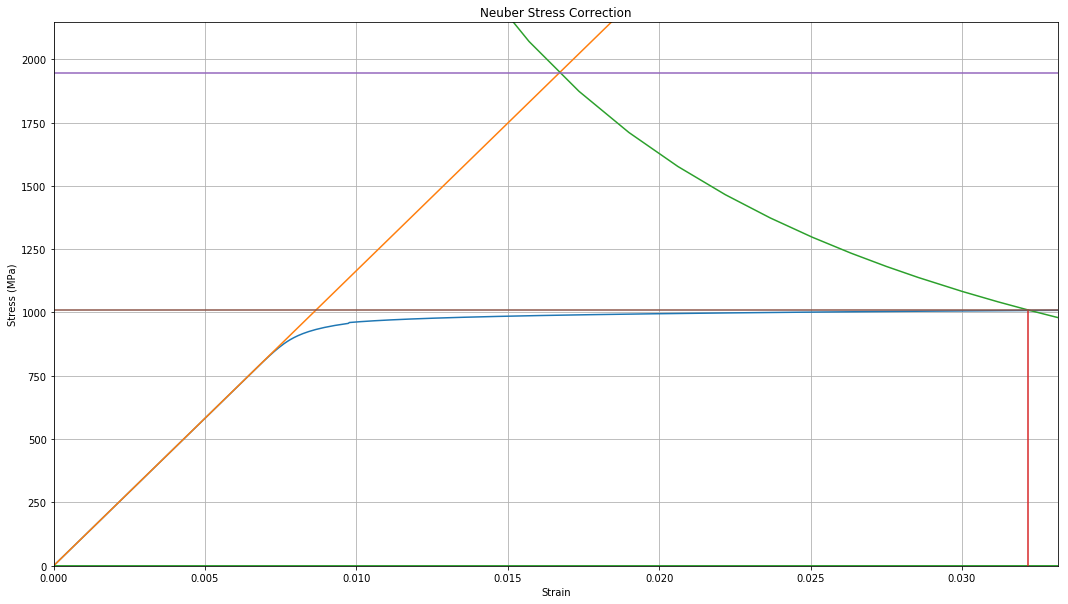

In [187]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(18, 10)) 
ax.plot(RO_strain, comp_el_stress)
ax.plot(RO_strain, linear_FE_stress)
ax.plot(neuber_strain, linear_FE_stress)
ax.plot([peak_strain_correct,peak_strain_correct], [0,peak_stress_correct])
ax.plot([0,2], [peak_stress_FEM,peak_stress_FEM])
ax.plot([0,2], [peak_stress_correct,peak_stress_correct])

ax.set(xlabel='Strain', ylabel='Stress (MPa)',
       title='Neuber Stress Correction')
ax.grid()
fig.savefig("test.png")
plt.axis([0, peak_strain_correct+0.001,0, peak_stress_FEM+200])
plt.show()